**Jade CHang**

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 6A: K-Nearest Neighbor

In this lab we will be using the library scikit-learn to train a K-Nearest Neighbor classifier and graph the results.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: Load and visualize dataset

- Below, load in the datasets (`file_train.csv`, `file_test.csv`). the training set has 800 samples and the test set has 200 samples.
- Create a figure with two subplots showing the train and test data side-by-side.
    - Be sure to label your subplots with informative titles (which datset are we looking at?).
    - Color-code the points based on their class.
    - Set the figure size to make everything clearly legible (not microscopic).

#### Format of data
- Column 1: x coordinate of a 2D point.
- Column 2: y coordinate of a 2D point.
- Column 3: class. Which spiral arm does the point belong to? Labels: [0, 1]

In [9]:
train = np.loadtxt('data/file_train.csv', skiprows=1, delimiter=',')

test = np.loadtxt('data/file_test.csv', skiprows=1, delimiter=',')


In [7]:
print(train.shape)
print(test.shape)

(199, 3)
(199, 3)


Text(0.5, 1.0, 'Testing 2')

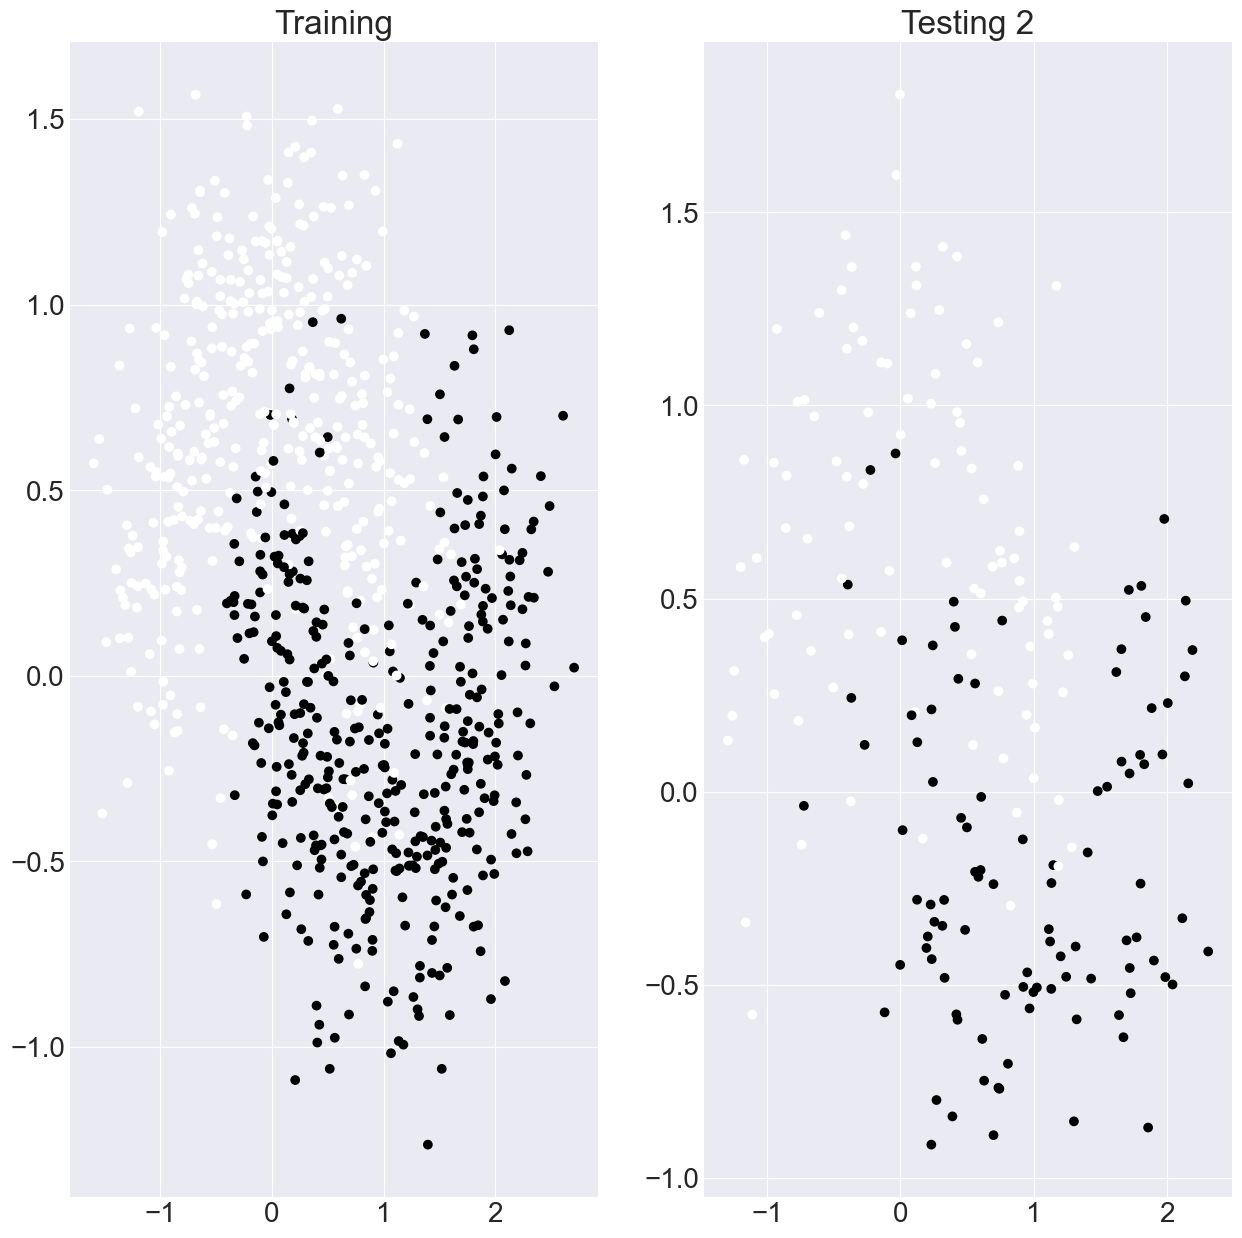

In [10]:
fig, ax = plt.subplots(1,2, figsize = (15,15))


ax[0].scatter(train[:,0], train[:,1],c = train[:,2]) #training
ax[0].set_title("Training")

ax[1].scatter(test[:,0], test[:,1],c = test[:,2]) #testing
ax[1].set_title("Testing 2")

## Task 2: Predict dataset and graph results

1. Create a [K-Nearest Neighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) [(More Info)](https://scikit-learn.org/stable/modules/neighbors.html#classification).  Set `n_neighbors` equal to 10.
2. Use the fit method with the coordinate columns of the training dataset as X and the class column as the target.
3. Calculate the accuracy of the classifier with the test data using the score method.
4. Print the accuracy of the classifier.
    

In [100]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=10)
neigh.fit(train[:,0:2],train[:,2])

KNeighborsClassifier(n_neighbors=10)

In [102]:
neigh.predict(test[:,0:2])
score = neigh.score(test[:,0:2], test[:,2])
print(score)

0.9195979899497487


## Task 3: Visualize class boundaries

Visualize how different regions of the (2D) dataspace would be classified based on the results of the trained KNN Classifier from Task 2.

1. Create a meshgrid for predicting values
    1. Create a [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) for your x-axis and your y-axis
        2. Set the start argument to the min value of your column -.5
        3. Set the end argument to the max value of your column +.5
        4. Set the number of samples to 300
    2. Assign `x_samples` and `y_samples` to a [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) with the linspace as the arguments for x1 and x2.
    3. [Flatten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.flatten.html)`x_samples` and `y_samples` and save into new variables.
    3. Create a list of x and y sample coordinate pairs, by [column stacking](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) the flattened x_samples and y_samples
2. Use your coordinate pairs as predict inputs for the knn classifier you created in Task 2. 
3. Reshape the results to the same shape as `x_samples`.
1. In 1 plot, graph your results
    1. Create two [ListedColormap](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.colors.ListedColormap.html) [(example)](https://matplotlib.org/3.2.1/tutorials/colors/colormap-manipulation.html)
        1. One should have dark values of 2 colors
        1. One should have light values of the same 2 colors
    1. Use [pcolormesh](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) to plot your predicted values grid.
        1. Plot x_samples, y_samples and your reshaped predicted results and the light value colormap.
    2. Plot the training points with using a scatter plot with the dark value colormap.
    3. Title your plot and label the axis.

In [123]:
from matplotlib.colors import ListedColormap
from palettable import cartocolors

300
(300, 300)
(90000, 2)


/var/folders/mq/1y998ggn22x4bnsc2trj8c0w0000gn/T/ipykernel_69261/1651676446.py:25: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(space,space,y_pred,cmap = cmap, shading = 'auto')


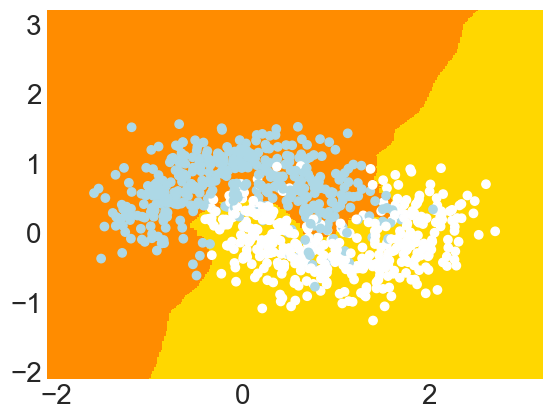

In [127]:
x = train[:,0]
y = train[:,1]
space = np.linspace(x.min()-.5,x.max()+.5,300)
num_samples = 300

cmap = ListedColormap(["darkorange","gold"])
light_cmap =  ListedColormap(["lightblue","white"])
# samp_vec = np.arange(self.exemplars.min(),self.exemplars.max(),
#                              (self.exemplars.max()-self.exemplars.min())/n_sample_pts)

print(len(space))
x, y = np.meshgrid(space, space)
        
print(x.shape)
x = x.reshape(num_samples*num_samples,1)
y = y.reshape(num_samples*num_samples,1)
   
fake_data = np.concatenate((x,y), axis = 1)
print(fake_data.shape)

y_pred = neigh.predict(fake_data)
y_pred = y_pred.reshape(num_samples, num_samples)


plt.pcolormesh(space,space,y_pred,cmap = cmap, shading = 'auto')
#ax[0].colorbar()
#ax[0].x_label("x")
#plt.set_title("Predict A")

plt.scatter(train[:,0], train[:,1],c = train[:,2],cmap = light_cmap) #training


